**UNZIP** **DATASET**

In [ ]:
!unzip /content/DS-assignment.zip

Archive:  /content/DS-assignment.zip
mapname:  conversion of  failed
 extracting: Data Science Assignment.pdf  
 extracting: DS - Assignment Part 2 data set.zip  
 extracting: DS - Assignment Part 1 data set.xlsx  


**IMPORT REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

We 414 rows × 9 columns in our dataset which have 3 integer values 'number of convenience stores','house size' and 'number of bedrooms'  & rest float values. We have target class 'House price of unit area'.  

In [ ]:
df=pd.read_excel("/content/DS - Assignment Part 1 data set.xlsx")
df
#df.info()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


  We used correlation table from pandas to see which attribute is more related to our target class say 'y'.
so if value is +ve and close to 1 that means value is directly proportional(if value of attribute increase then value of y will increase too) to y and if close to -1 that means inversely proportional(if value of attribute increase the value of y decrease and vice versa) to y. Value of 0 means it does not depend to attribute at all.

So here 'Number of convenience stores' has highest 
correlation value of 0.571 and then latitude and
longitude. And Distance from metro station has lowest of -0673 and then house age(as if distance of metro station is less them house price will be high and so for house age old houses will be cheaper).

correlation metrix for dataset:  House price of unit area                    1.000000
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House price of unit area, dtype: float64


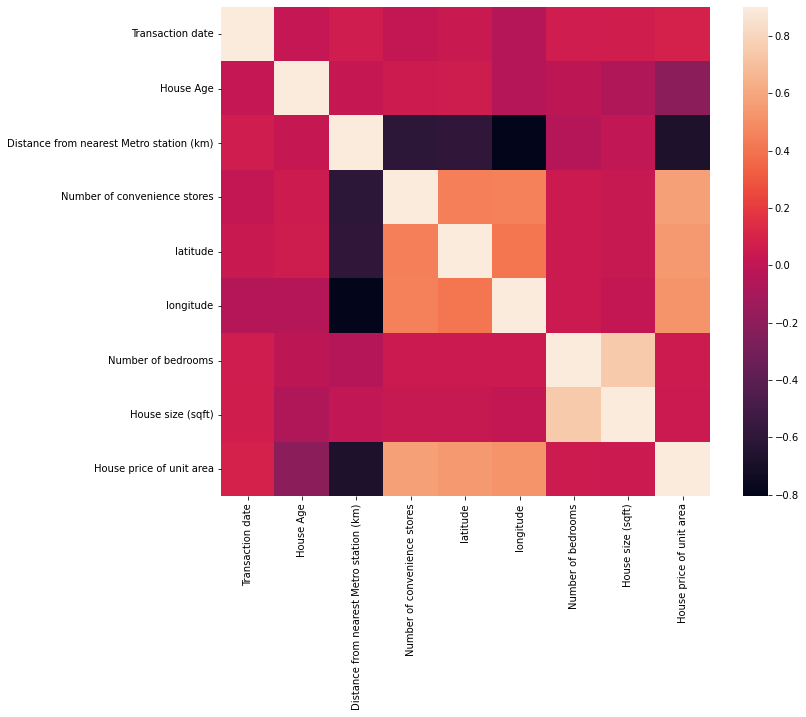

In [ ]:
corr_matrix=df.corr()
print('correlation metrix for dataset: ',corr_matrix["House price of unit area"].sort_values(ascending=False))
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


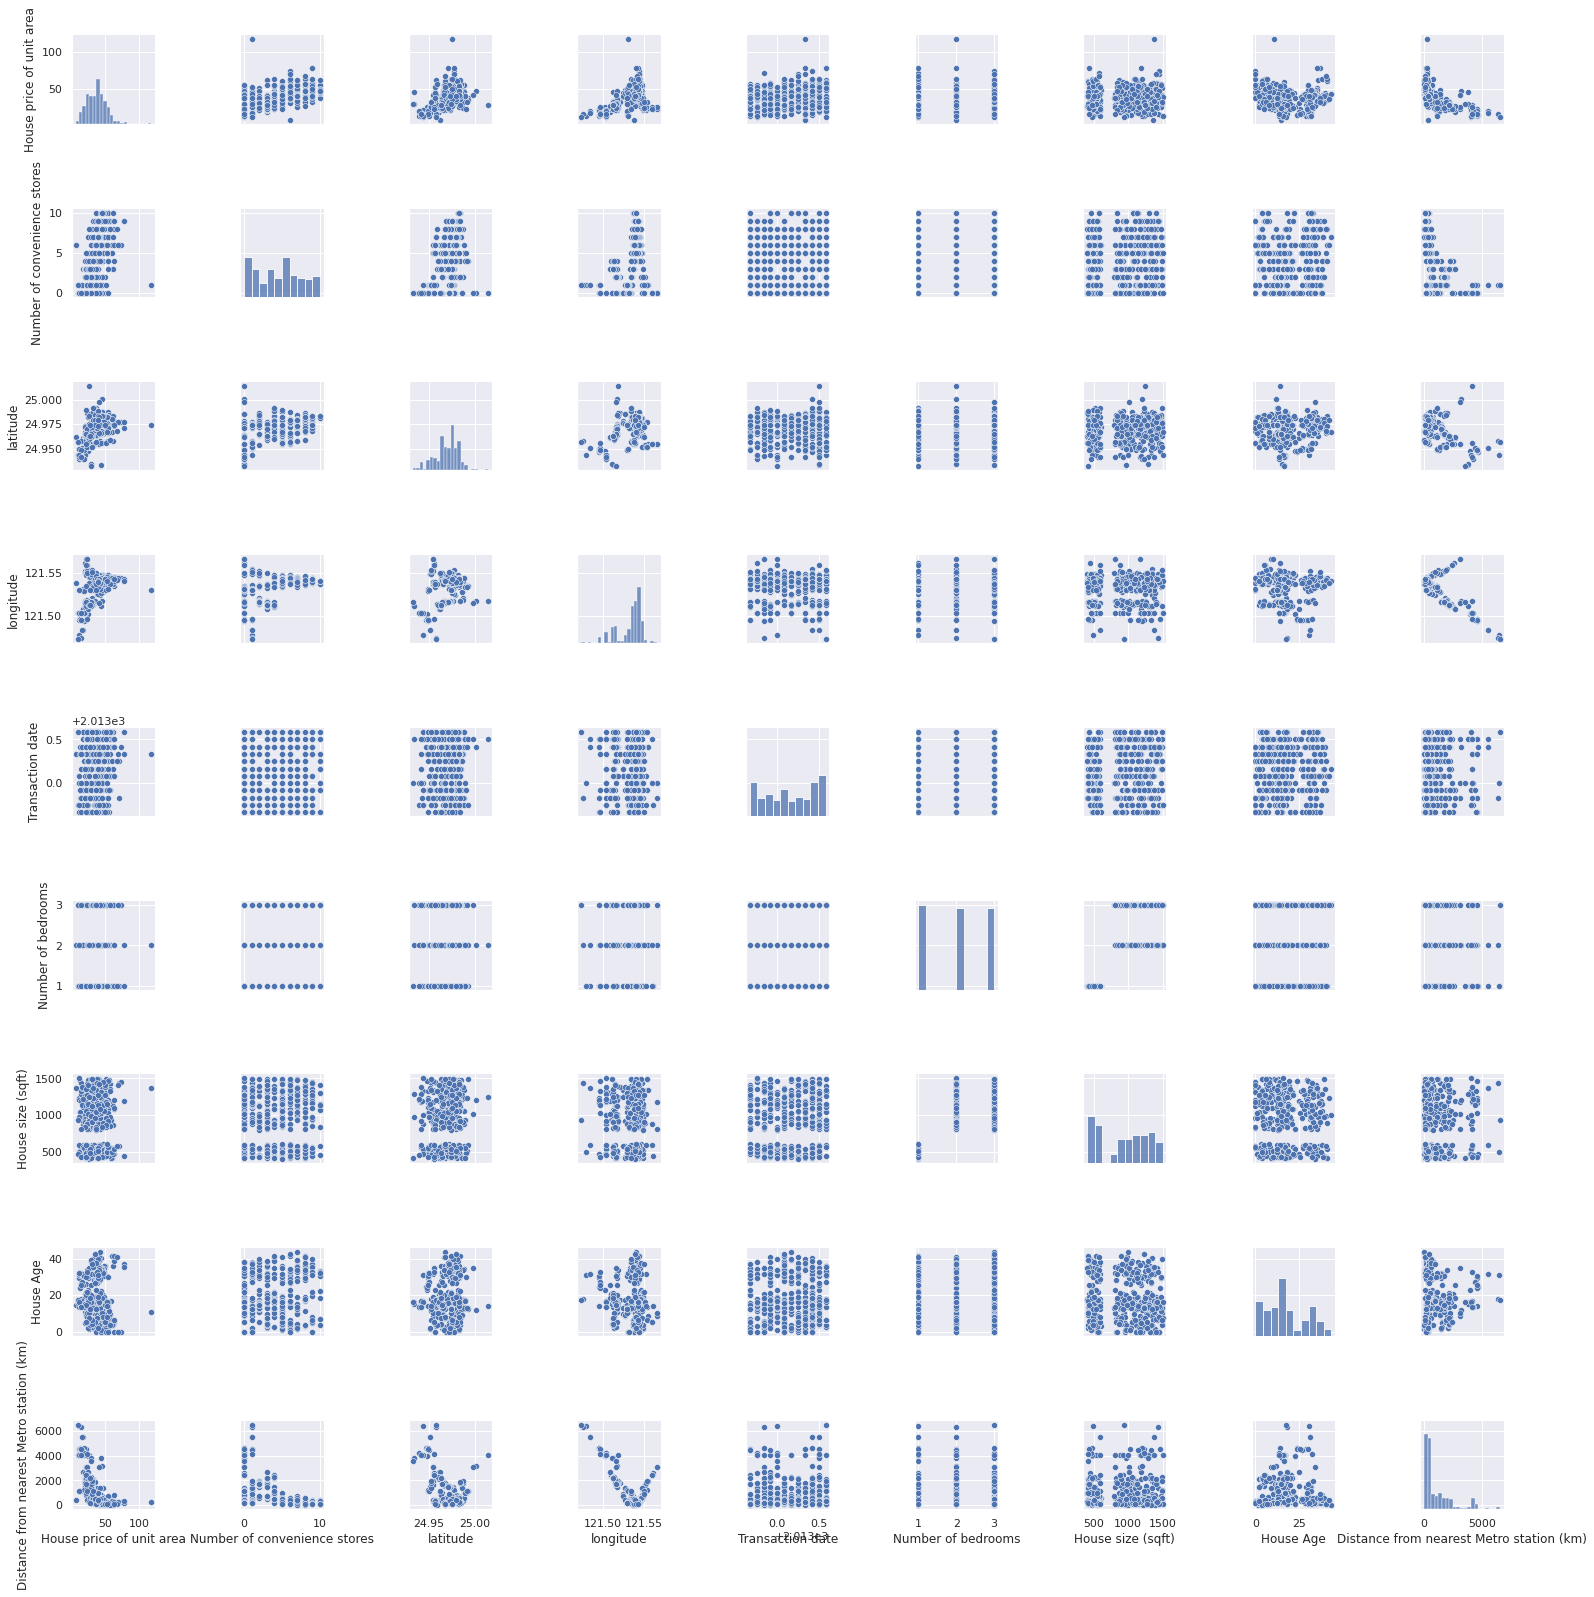

In [ ]:
#scatterplot for selected columns (defined in cols)
sns.set()
cols = ['House price of unit area','Number of convenience stores','latitude','longitude',
        'Transaction date','Number of bedrooms','House size (sqft)','House Age',
        'Distance from nearest Metro station (km)']
sns.pairplot(df[cols], height = 2.5)
plt.show()

[]

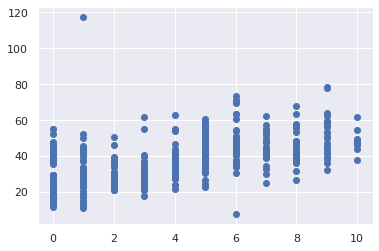

In [ ]:
plt.scatter(df['Number of convenience stores'],df['House price of unit area'])
plt.plot()


In [ ]:
from sklearn.preprocessing import StandardScaler

y=df['House price of unit area']
df=df.drop(['House price of unit area'],axis=1)
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491
...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597


**Split dataset into training and testing data**


After that we used scaling to scales each input variable separately to the range 0-1.

 Machine learning models learn a mapping from input variables to an output variable.
As such, the scale and distribution of the data drawn from the domain may be different for each variable.
Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(df,y,test_size = 0.2, random_state= 0)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(331, 6)
(83, 6)


We used following regression techniques:

1.   gradient boosting 
2.   elastic net 
3.   SGD
4.   svm
5.   bayesian ridge
6.   XGB
7.   linear regression 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
 

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("linear regression MSE",mean_squared_error(y_test,y_pred))   #59.75353802453733

from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("gradient boosting MSE",mean_squared_error(y_test,y_pred))

from sklearn.linear_model import ElasticNet

regressor = ElasticNet()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("elastic net MSE",mean_squared_error(y_test,y_pred))

from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("SGD MSE",mean_squared_error(y_test,y_pred))

from sklearn.svm import SVR

regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("svm MSE",mean_squared_error(y_test,y_pred))

from xgboost.sklearn import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("XGB MSE",mean_squared_error(y_test,y_pred))

from sklearn.linear_model import BayesianRidge

regressor = BayesianRidge()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("bayesian ridge MSE",mean_squared_error(y_test,y_pred))

linear regression MSE 62.07841641530361
gradient boosting MSE 46.63777426212092
elastic net MSE 72.32494287738598
SGD MSE 62.27137204568098
svm MSE 71.39922104072755
[11:14:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB MSE 48.0539690450888
bayesian ridge MSE 62.39780961271714


As we got best results(lowest error) on XGB and gradient boost. now we will try to find best parameters for these with the help of grid search.


In [ ]:
parameters={'loss':('squared_error', 'absolute_error', 'huber', 'quantile'),'n_estimators':[50,100,150]}

regressor = GradientBoostingRegressor()
regressor=GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("MSE",mean_squared_error(y_test,y_pred))

print(regressor.best_params_)
print(regressor.best_score_)

MSE 42.71358026125338
{'loss': 'absolute_error', 'n_estimators': 150}
-57.41090232853393


In [ ]:
parameters={'n_estimators':[50,100,150]}

regressor = XGBRegressor()
regressor=GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("XGB MSE",mean_squared_error(y_test,y_pred))
print(regressor.best_params_)
print(regressor.best_score_)

[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:51:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re